# CS 145 Final Project

## Loading Essentials and Helper Functions

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.svm import SVC  #SVM classifier
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, Normalizer, MinMaxScaler
from sklearn.compose import ColumnTransformer, make_column_transformer

from matplotlib import pyplot
import itertools
%matplotlib inline

In [63]:
# Helper function that allows we to draw nicely formatted confusion matrices
def draw_confusion_matrix(y, yhat, classes):
    '''
        Draws a confusion matrix for the given target and predictions
        Adapted from scikit-learn and discussion example.
    '''
    plt.cla()
    plt.clf()
    matrix = confusion_matrix(y, yhat)
    plt.imshow(matrix, interpolation='nearest', cmap=plt.cm.YlOrBr)
    plt.title("Confusion Matrix")
    plt.colorbar()
    num_classes = len(classes)
    plt.xticks(np.arange(num_classes), classes, rotation=90)
    plt.yticks(np.arange(num_classes), classes)
    
    fmt = 'd'
    thresh = matrix.max() / 2.
    for i, j in itertools.product(range(matrix.shape[0]), range(matrix.shape[1])):
        plt.text(j, i, format(matrix[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if matrix[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()

## Dataset Description

This is a csv file containing related information of 5172 randomly picked email files and their respective labels for spam or not-spam classification. We obtained the dataset from [here](https://www.kaggle.com/datasets/balaka18/email-spam-classification-dataset-csv).

The csv file contains 5172 rows, each row for each email. There are 3002 columns. The first column indicates Email name. The name has been set with numbers and not recipients' name to protect privacy. The last column has the labels for prediction : 1 for spam, 0 for not spam. The remaining 3000 columns are the 3000 most common words in all the emails, after excluding the non-alphabetical characters/words. For each row, the count of each word(column) in that email(row) is stored in the respective cells. Thus, information regarding all 5172 emails are stored in a compact dataframe rather than as separate text files.

## Load and Analyze the Dataset

In [2]:
#Load Data
data = pd.read_csv('emails.csv')

In [3]:
data.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [4]:
data.describe()

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
count,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,...,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000
mean,6.640565,6.188128,5.143852,3.075599,3.124710,2.627030,55.517401,2.466551,2.024362,10.600155,...,0.005027,0.012568,0.010634,0.098028,0.004254,0.006574,0.004060,0.914733,0.006961,0.290023
std,11.745009,9.534576,14.101142,6.045970,4.680522,6.229845,87.574172,4.314444,6.967878,19.281892,...,0.105788,0.199682,0.116693,0.569532,0.096252,0.138908,0.072145,2.780203,0.098086,0.453817
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,12.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,3.000000,1.000000,1.000000,2.000000,1.000000,28.000000,1.000000,0.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.000000,7.000000,4.000000,3.000000,4.000000,2.000000,62.250000,3.000000,1.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,210.000000,132.000000,344.000000,89.000000,47.000000,77.000000,1898.000000,70.000000,167.000000,223.000000,...,4.000000,7.000000,2.000000,12.000000,3.000000,4.000000,3.000000,114.000000,4.000000,1.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3002 entries, Email No. to Prediction
dtypes: int64(3001), object(1)
memory usage: 118.5+ MB


We need to check if the dataset has any missing value that needs to be handled.

In [7]:
data.isnull().sum().sum()

0

Now we know that there is no null in the dataset. Before any further steps, we want to remove the 'Email No.' column.

In [8]:
data = data.drop(["Email No."],axis = 1)

Note that since the target column 'Prediction' is already taking value in 0 and 1, we do not need to employ any encoder to transform the target label.
### Correlation between features and target feature
Since we have a large number of features (>3000), we are not going to plot the confusion matrix. Instead, we can see the sorted list of correlations of our target feature.

In [10]:
correlations = data.corr()
correlations["Prediction"].sort_values(ascending=False)

Prediction    1.000000
more          0.258152
our           0.228187
able          0.222219
best          0.221703
                ...   
attached     -0.236558
thank        -0.262384
hanks        -0.266070
hpl          -0.266518
thanks       -0.271433
Name: Prediction, Length: 3001, dtype: float64

In [90]:
correlations["the"].sort_values(ascending=False)

the      1.000000
th       0.965603
he       0.958440
to       0.852715
t        0.852174
           ...   
iferc   -0.063137
hplo    -0.077497
hplno   -0.088787
xl      -0.117177
xls     -0.129400
Name: the, Length: 3001, dtype: float64

Seems like there is no strong linear correlation/relationship between features and target features, but that is acceptable because we can apply models that are suitable for such dataset.
### Check for inbalanced classes
Since we are doing classfication, we want to check if our dataset prefers one class over the other.

0    3672
1    1500
Name: Prediction, dtype: int64

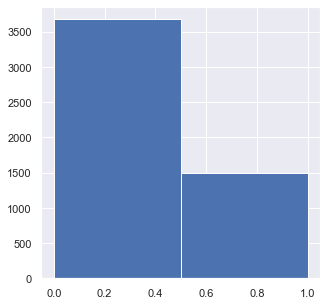

In [12]:
data['Prediction'].hist(bins=2, figsize=(5,5))
data['Prediction'].value_counts()

There is a mild imbalance in our dataset and this is something we need to keep in mind if we find that our models do not perform well on the minority classes. Since the imbalance is not big enough, we will not perform balancing techniques for this dataset.

### Setting up the data

In [43]:
y = data["Prediction"]
x = data.drop(["Prediction"],axis = 1)
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, stratify= y, random_state=0)

To ensure that there is not an imbalance of classes in the training and testing set, we use the stratify parameter in train_test_split to perform stratified sampling on the data. We want to test that the splits are somewhat balanced.

0    2937
1    1200
Name: Prediction, dtype: int64

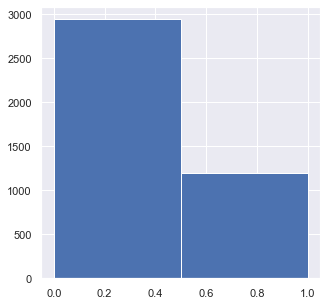

In [18]:
#Training classes
target.hist(bins=2, figsize=(5,5))
target.value_counts()

0    735
1    300
Name: Prediction, dtype: int64

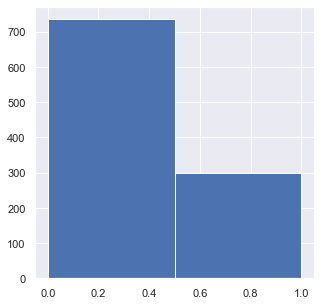

In [19]:
#Testing classes
target_test.hist(bins=2, figsize=(5,5))
target_test.value_counts()

We can see that the class balance is about the same as before the split, so our data is ready for training and testing.

## Model Selection
Now we are going to train, test, and tune 3 models on our preprocessed dataset. We will first run the default models and then use a k-fold cross validation to tune the hypterparameters.

### Support vector machine (SVM)

In [54]:
svm = SVC()
svm.fit(x_train, y_train)
y_pred = svm.predict(x_test)

print("Accuracy: ", metrics.accuracy_score(y_test,y_pred))

/Users/leeesme/opt/anaconda3/envs/hw4/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy:  0.9024154589371981


### Naive Bayes

In [46]:
nb = MultinomialNB()
nb.fit(x_train, y_train)

y_pred = nb.predict(x_test)
print("Accuracy: ", metrics.accuracy_score(y_test,y_pred))

Accuracy:  0.9371980676328503


### K-nearest neighbors

In [52]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

print("test accuracy: ", metrics.accuracy_score(y_test, y_pred))

test accuracy:  0.8589371980676328


Before conducting cross validation, we want to get a smaller range for k value to tune.

In [57]:
for k in [1,2,3,5,7,9,10,20,50]:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    print("k =",k,": test accuracy =", metrics.accuracy_score(y_test, y_pred))

k = 1 : test accuracy = 0.8657004830917875
k = 2 : test accuracy = 0.8579710144927536
k = 3 : test accuracy = 0.863768115942029
k = 5 : test accuracy = 0.8589371980676328
k = 7 : test accuracy = 0.8743961352657005
k = 9 : test accuracy = 0.8657004830917875
k = 10 : test accuracy = 0.8734299516908213
k = 20 : test accuracy = 0.8666666666666667
k = 50 : test accuracy = 0.8531400966183574


### Cross validation
We will conudct a GridSearchCV with 3-Fold Cross Validation, running each classification model with different parameters.

In [60]:
k = 3
kf = KFold(n_splits=k, random_state=None)

parameters_svm = {"clf": [SVC()],
                  "clf__kernel": ["sigmoid","rbf",'poly'],
                  "clf__C": [0.0001,0.1,100],
                 "clf__gamma": [0.0001,0.1,100]}

parameters_nb = {"clf": [MultinomialNB()],
                   "clf__alpha": [0.0001, 0.001, 0.1, 1, 10, 100]}

parameters_knn = {"clf": [KNeighborsClassifier()],
                  "clf__n_neighbors": [3,5,7,9,11,15],
                  "clf__metric": ["euclidean","manhattan"]}

model = Pipeline([("clf", SVC())])
params = [parameters_knn, parameters_nb, parameters_svm]
grid = GridSearchCV(model, params, cv=kf, scoring = "accuracy")
grid.fit(x_train, y_train)

res = pd.DataFrame(grid.cv_results_)
res

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf,param_clf__metric,param_clf__n_neighbors,param_clf__alpha,param_clf__C,param_clf__gamma,param_clf__kernel,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.258312,0.012983,5.343833,0.043259,"KNeighborsClassifier(algorithm='auto', leaf_si...",euclidean,3,NaN,NaN,NaN,NaN,"{'clf': KNeighborsClassifier(algorithm='auto',...",0.842640,0.847716,0.861494,0.850616,0.007966,25
1,0.265298,0.008357,5.580006,0.065141,"KNeighborsClassifier(algorithm='auto', leaf_si...",euclidean,5,NaN,NaN,NaN,NaN,"{'clf': KNeighborsClassifier(algorithm='auto',...",0.843365,0.847716,0.863669,0.851583,0.008729,24
2,0.255522,0.012891,5.707830,0.037856,"KNeighborsClassifier(algorithm='auto', leaf_si...",euclidean,7,NaN,NaN,NaN,NaN,"{'clf': KNeighborsClassifier(algorithm='auto',...",0.846265,0.844090,0.875272,0.855209,0.014214,20
3,0.266631,0.012866,5.857244,0.041633,"KNeighborsClassifier(algorithm='auto', leaf_si...",euclidean,9,NaN,NaN,NaN,NaN,"{'clf': KNeighborsClassifier(algorithm='auto',...",0.851342,0.836838,0.874547,0.854242,0.015530,21
4,0.262398,0.008099,5.911099,0.061076,"KNeighborsClassifier(algorithm='auto', leaf_si...",euclidean,11,NaN,NaN,NaN,NaN,"{'clf': KNeighborsClassifier(algorithm='auto',...",0.849891,0.836838,0.871646,0.852792,0.014357,23
5,0.248614,0.003238,6.040737,0.069525,"KNeighborsClassifier(algorithm='auto', leaf_si...",euclidean,15,NaN,NaN,NaN,NaN,"{'clf': KNeighborsClassifier(algorithm='auto',...",0.845540,0.843365,0.871646,0.853517,0.012850,22
6,0.257846,0.005674,8.868437,0.007652,"KNeighborsClassifier(algorithm='auto', leaf_si...",manhattan,3,NaN,NaN,NaN,NaN,"{'clf': KNeighborsClassifier(algorithm='auto',...",0.883974,0.888325,0.899927,0.890742,0.006734,14
7,0.257981,0.010612,9.235680,0.042329,"KNeighborsClassifier(algorithm='auto', leaf_si...",manhattan,5,NaN,NaN,NaN,NaN,"{'clf': KNeighborsClassifier(algorithm='auto',...",0.887600,0.883249,0.905004,0.891951,0.009399,13
8,0.268978,0.022225,9.768406,0.194081,"KNeighborsClassifier(algorithm='auto', leaf_si...",manhattan,7,NaN,NaN,NaN,NaN,"{'clf': KNeighborsClassifier(algorithm='auto',...",0.886149,0.878898,0.896302,0.887116,0.007138,15
9,0.249550,0.001651,9.618096,0.170603,"KNeighborsClassifier(algorithm='auto', leaf_si...",manhattan,9,NaN,NaN,NaN,NaN,"{'clf': KNeighborsClassifier(algorithm='auto',...",0.879623,0.877447,0.895577,0.884216,0.008082,18


In [61]:
grid.best_params_

{'clf': MultinomialNB(alpha=0.0001, class_prior=None, fit_prior=True),
 'clf__alpha': 0.0001}

In [62]:
grid.best_score_

0.9581822576746435

We want to use the Multinomial Naive Bayes model with best parameters to report the test accuracy and print out the confusion matrix.

The best performing model is MultinomialNB.
test accuracy = 0.9497584541062802
test preceision = 0.9


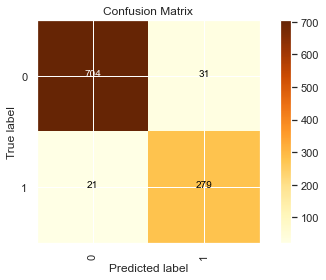

In [79]:
nb = MultinomialNB(alpha=0.0001, class_prior=None, fit_prior=True)
nb.fit(x_train, y_train)
y_pred = nb.predict(x_test)
print("The best performing model is MultinomialNB.")
print("test accuracy =", metrics.accuracy_score(y_test, y_pred))
print("test preceision =", metrics.precision_score(y_test, y_pred))
draw_confusion_matrix(y_test, y_pred, [0,1])

By looking at this confusion matrix, we can see the number of non-spam emails classified as spam is a little high, which means the precison of the model is a bit low. This is not desirable because we prefer having spam email classified as non-spam over having non-spam email classified as spam as important emails might be overlooked.

Therefore, we want to do another gridsearch with scoring = ‘average_precision’ to see if Multinomial Naive Bayes is still the best model.

In [69]:
k = 3
kf = KFold(n_splits=k, random_state=None)

parameters_svm = {"clf": [SVC()],
                  "clf__kernel": ["sigmoid","rbf",'poly'],
                  "clf__C": [0.0001,0.1,100],
                 "clf__gamma": [0.0001,0.1,100]}

parameters_nb = {"clf": [MultinomialNB()],
                   "clf__alpha": [0.0001, 0.001, 0.1, 1, 10, 100]}

parameters_knn = {"clf": [KNeighborsClassifier()],
                  "clf__n_neighbors": [3,5,7,9,11,15],
                  "clf__metric": ["euclidean","manhattan"]}

model = Pipeline([("clf", SVC())])
params = [parameters_knn, parameters_nb, parameters_svm]
grid = GridSearchCV(model, params, cv=kf, scoring = "average_precision")
grid.fit(x_train, y_train)

res1 = pd.DataFrame(grid.cv_results_)
res1

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf,param_clf__metric,param_clf__n_neighbors,param_clf__alpha,param_clf__C,param_clf__gamma,param_clf__kernel,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.595056,0.102985,8.679952,0.334237,"KNeighborsClassifier(algorithm='auto', leaf_si...",euclidean,3,NaN,NaN,NaN,NaN,"{'clf': KNeighborsClassifier(algorithm='auto',...",0.724072,0.775177,0.776274,0.758508,0.024354,29
1,0.483072,0.119478,8.818187,0.610513,"KNeighborsClassifier(algorithm='auto', leaf_si...",euclidean,5,NaN,NaN,NaN,NaN,"{'clf': KNeighborsClassifier(algorithm='auto',...",0.772186,0.804559,0.814533,0.797093,0.018076,27
2,0.390888,0.057256,8.253078,0.301658,"KNeighborsClassifier(algorithm='auto', leaf_si...",euclidean,7,NaN,NaN,NaN,NaN,"{'clf': KNeighborsClassifier(algorithm='auto',...",0.787721,0.810528,0.836572,0.811607,0.019958,25
3,0.331833,0.002289,8.104271,0.184741,"KNeighborsClassifier(algorithm='auto', leaf_si...",euclidean,9,NaN,NaN,NaN,NaN,"{'clf': KNeighborsClassifier(algorithm='auto',...",0.798286,0.812620,0.841491,0.817466,0.017968,22
4,0.345211,0.008383,8.663879,0.358644,"KNeighborsClassifier(algorithm='auto', leaf_si...",euclidean,11,NaN,NaN,NaN,NaN,"{'clf': KNeighborsClassifier(algorithm='auto',...",0.801111,0.811058,0.845664,0.819278,0.019094,21
5,0.346155,0.016098,9.119216,0.472758,"KNeighborsClassifier(algorithm='auto', leaf_si...",euclidean,15,NaN,NaN,NaN,NaN,"{'clf': KNeighborsClassifier(algorithm='auto',...",0.795260,0.809712,0.838017,0.814330,0.017759,24
6,0.361495,0.025678,13.422344,0.300540,"KNeighborsClassifier(algorithm='auto', leaf_si...",manhattan,3,NaN,NaN,NaN,NaN,"{'clf': KNeighborsClassifier(algorithm='auto',...",0.828491,0.835870,0.872906,0.845756,0.019433,15
7,0.427232,0.131494,13.962638,0.548142,"KNeighborsClassifier(algorithm='auto', leaf_si...",manhattan,5,NaN,NaN,NaN,NaN,"{'clf': KNeighborsClassifier(algorithm='auto',...",0.868490,0.874749,0.897744,0.880328,0.012578,10
8,0.372060,0.026670,16.120935,1.032718,"KNeighborsClassifier(algorithm='auto', leaf_si...",manhattan,7,NaN,NaN,NaN,NaN,"{'clf': KNeighborsClassifier(algorithm='auto',...",0.877762,0.900164,0.906336,0.894754,0.012277,8
9,0.326654,0.005174,12.986482,0.346075,"KNeighborsClassifier(algorithm='auto', leaf_si...",manhattan,9,NaN,NaN,NaN,NaN,"{'clf': KNeighborsClassifier(algorithm='auto',...",0.874693,0.912590,0.909431,0.898905,0.017169,7


In [72]:
grid.best_params_

{'clf': SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
     decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
     max_iter=-1, probability=False, random_state=None, shrinking=True,
     tol=0.001, verbose=False),
 'clf__C': 100,
 'clf__gamma': 0.0001,
 'clf__kernel': 'rbf'}

In [73]:
grid.best_score_

0.9736193369188783

The second grid search gives us a different best SVM model. Let use this model with the best parameters to report the test accuracy and print out the confusion matrix to see its performance and make comparison.

The best performing model is SVM.
test accuracy = 0.9545893719806763
test preceision = 0.9438596491228071


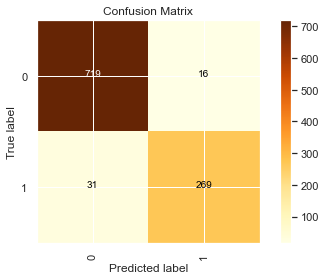

In [91]:
svm = SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
     decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
     max_iter=-1, probability=False, random_state=None, shrinking=True,
     tol=0.001, verbose=False)
svm.fit(x_train, y_train)
y_pred = svm.predict(x_test)
print("The best performing model is SVM.")
print("test accuracy =", metrics.accuracy_score(y_test, y_pred))
print("test preceision =", metrics.precision_score(y_test, y_pred))
draw_confusion_matrix(y_test, y_pred, [0,1])

We found that after we change the scoring method from accuracy to precision, the Multinomial Naive Bayes is no longer the best model.

It is very interesting that the new best SVM model tuned based on precision actually achieved higher testing accuracy than the previous best Multinomial Naive Bayes while it has a higher precision.

Another interesting finding is the model performs the worst in the second gridsearch is also a SVM, but with sigmoid kernel function. This implies that the choice of kernel function is very crucial for SVM.

## Conclusion and Analysis

We have done 2 gridsearch on the datasets using accuracy and average precision as scoring criterion, respectively. Through comparing the resulting precision and testing accuracy of the best model selected by the the 2 gridsearch we have came to a conclusion that the SVM with parameters (C=100, cache_size=200, class_weight=None, coef0=0.0, decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf', max_iter=-1, probability=False, random_state=None, shrinking=True, tol=0.001, verbose=False) is the best performing spam classifier.

It is interesting to see that the gridsearch uses avergae precision as scoring method selects a model that has higher testing accuracy than the model selected by the gridsearch with scoring = accuracy. One possible explanation might be that gridsearch with scoring accuracy selects the model with highest validation accuracy, so it is tuned with validation data but not testing data, and it is not guaranteed that the selected model will have the highest testing accuracy. Another explanation might be that precision might be a more appropriate measure than accuracy for imbalanced classes, where our dataset has mild imbalance.